<a href="https://colab.research.google.com/github/OmarMachuca851/Task/blob/main/housing_price_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Housing Price Forescasts**

## Problema 1: Selección de características para la prática

In [42]:
import pandas as pd

df = pd.read_csv('train.csv')

train_df = df[['GrLivArea', 'YearBuilt', 'SalePrice']]
train_df

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


## Problema 2: Estimación y evaluación por regresión lineal

In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
X = train_df[['GrLivArea', 'YearBuilt']].values
y = train_df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1095, 2) (365, 2) (1095,) (365,)


In [45]:
reg = LinearRegression().fit(X_train, y_train)
reg_predict = reg.predict(X_test)
pd.DataFrame([reg_predict, y_test])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,186781.334686,128153.038034,325582.770142,71282.259872,189813.067089,163890.534409,205695.22312,131745.043023,226058.891655,171792.213243,...,120492.911261,109836.790555,223485.239764,135773.698806,210139.166798,152722.491621,171541.709859,326413.212293,148432.550776,190740.210248
1,311500.000000,125000.000000,383970.000000,121000.000000,194000.000000,153000.000000,167500.00000,145000.000000,173000.000000,170000.000000,...,139400.000000,106500.000000,262500.000000,159950.000000,175900.000000,131500.000000,177000.000000,437154.000000,166000.000000,159000.000000


In [46]:
print('Mean Squared Error', mean_squared_error(y_test, reg_predict))

Mean Squared Error 2037987830.051394


In [47]:
# Visualization on a graph
def plot_graph(xlabel, ylabel, X, y_true, y_pred):
    plt.title('Visualization between ' + xlabel + ' and ' + ylabel)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(X, y_true, label='true value')
    plt.scatter(X, y_pred, label='predicted value')
    plt.legend()
    plt.show()

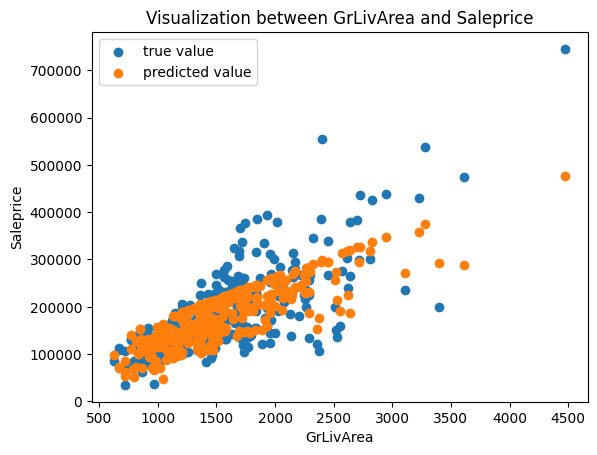

In [48]:
plot_graph('GrLivArea', 'Saleprice', X_test[:, 0], y_test, reg_predict)

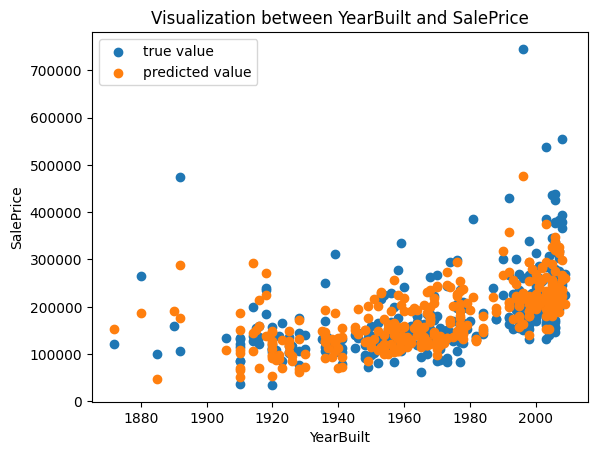

In [49]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, reg_predict)

## Problema 3: Comparación de métodos

In [50]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

### **SVR:**

In [51]:
svr = SVR()
svr.fit(X_train, y_train)
svr_predict = svr.predict(X_test)
print('Men Squared Error: ', mean_squared_error(y_test, svr_predict))

Men Squared Error:  7168385714.321568


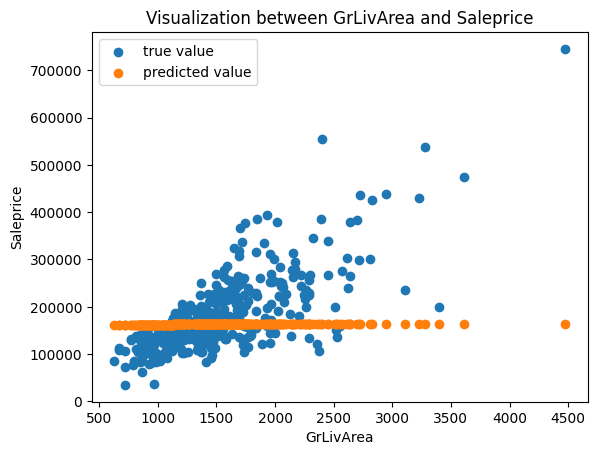

In [52]:
plot_graph('GrLivArea', 'Saleprice', X_test[:, 0], y_test, svr_predict)

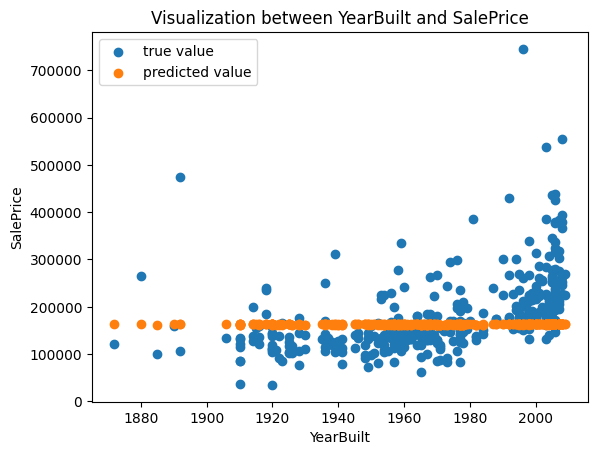

In [53]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, svr_predict)

### **Decision tree**

In [54]:
d_tree = DecisionTreeRegressor()
d_tree.fit(X_train, y_train)
d_tree_predict = d_tree.predict(X_test)
print('Mean Squared error: ', mean_squared_error(y_test, d_tree_predict))

Mean Squared error:  2841650745.5159817


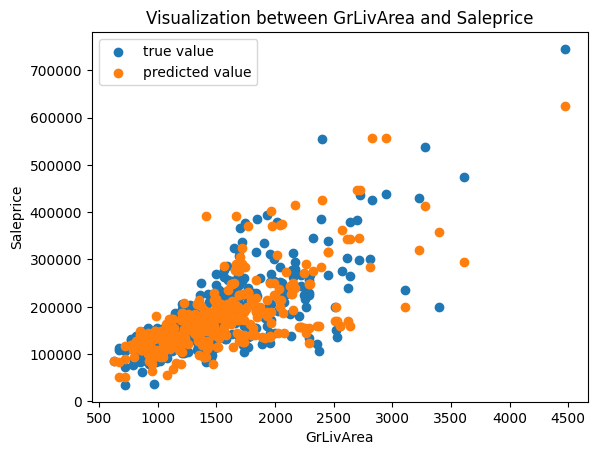

In [55]:
plot_graph('GrLivArea', 'Saleprice', X_test[:, 0], y_test, d_tree_predict)

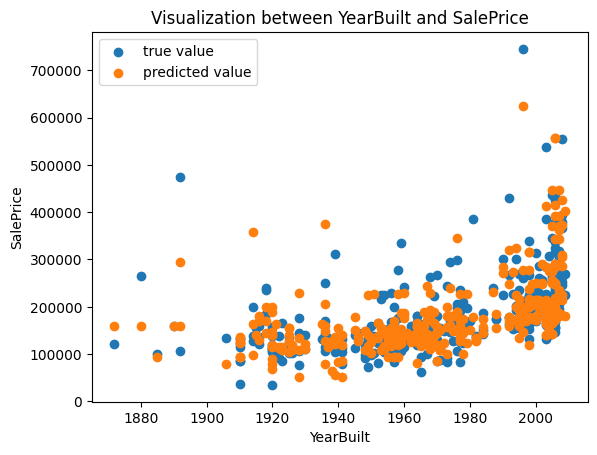

In [56]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, d_tree_predict)

## **Random Forest**

In [57]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
rand_forest_predict = rand_forest.predict(X_test)
print('Mean Squared error: ', mean_squared_error(y_test, rand_forest_predict))

Mean Squared error:  2778070224.347945


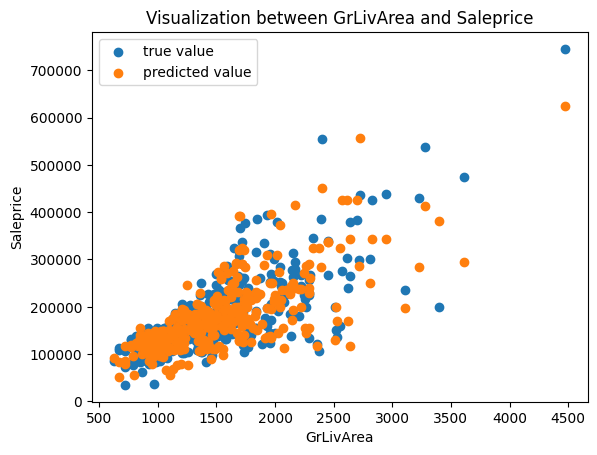

In [58]:
plot_graph('GrLivArea', 'Saleprice', X_test[:, 0], y_test, rand_forest_predict)

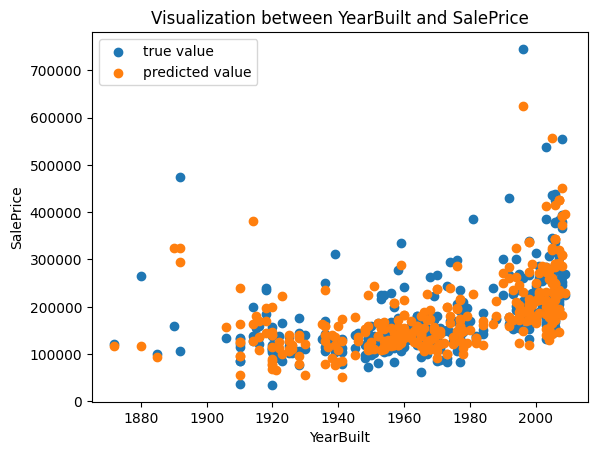

In [59]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, rand_forest_predict)

### Resumen del redndimiento de los modelos de Regression, SVR, Decision Tree, Random Forest

|Modelo|Valor MSE|Rendimiento|
|---|---|---|
|Linear Regresion|2,054,862,618|mejor rendimiento entre los modelos probados|
|SVR(Support Vector Regresion)|5,750,024,989|error mas alto entre los modelos probados|
|Decision Tree|3,460,257,190|Sobreajustes, lo que lleva a unamejor variación|
|Random Forest|2,832,282,852|rendimiento alto entre los modelos probados pero ligeramente inferior que la regresión lineal|

### Discusión basada en resultados y figuras visualizadas

- Mejor modelo: Linear Regressión tenía la MSE más bajo (2.05b), lo que significa que proporcionó las predicciones de precios de la vivienda más precisas entre los métodos probados.

- El peor rendimiento: SVR tuvo un mal desempeño con los valores predichos, que aparecen horizontalmente alineados en la gráfica de dispersión, lo que muestra que intentó adaptarse a los datos.

- Limitaciones de Decision tree: este modelo se sobrefianza, lo que significa que memorizó patrones en lugar de generalizar bien, lo que resulta en un MSE alto (3.46b)

- fuertes de Random forest: este modelo de precisión y generalización equilibrada, reduce el sobreajuste en comparación con decision tree, pero sigue siendo ligeramente peor que Linear Regression.

### Indights de visualización

- Las gráficasas de dispersión de Linear Regression mostranron unatendencia clara, con los precios de ventap redichos que alinean bien con los datos reales.

- Las gráficas de dispersión SVR tenían predicciones alineadas horizontalmente, lo que indica una captura de ralación POCG.

- Las gráficas de dispersión en Decision Tree mostraron diviciones agudas, lo que sugiere un sobreajuste alos datos de entrenamiento.

- Las gráficas de dispersión en Random Forest demostraron una tendencia más refinada, lo que muestra su capacidad para manejar mejor las variaciones complejas de los precios de las viviendas.

## Problema 4 (avanzado): Aprendizaje utilizando otras caracctrísticas

In [60]:
train_df2 = df[['GrLivArea', 'YearBuilt', 'SalePrice', 'LotArea', 'YrSold']]
train_df2

,GrLivArea,YearBuilt,SalePrice,LotArea,YrSold
0,1710,2003,208500,8450,2008
1,1262,1976,181500,9600,2007
2,1786,2001,223500,11250,2008
3,1717,1915,140000,9550,2006
4,2198,2000,250000,14260,2008
...,...,...,...,...,...
1455,1647,1999,175000,7917,2007
1456,2073,1978,210000,13175,2010
1457,2340,1941,266500,9042,2010
1458,1078,1950,142125,9717,2010


In [61]:
X = train_df2[['GrLivArea', 'YearBuilt', 'LotArea', 'YrSold']].values
y = train_df2['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

### Linear Regresion

In [62]:
reg = LinearRegression().fit(X_train, y_train)
reg_predict = reg.predict(X_test)
pd.DataFrame([reg_predict, y_test])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,203438.221176,171811.052359,98620.892691,79750.713076,58813.484175,328077.011795,213035.56758,89435.721388,178428.468554,145046.797247,...,186947.655874,223024.237608,188724.559647,238240.534548,166255.941038,118086.985696,145816.938821,86409.539106,252929.156953,225267.683542
1,115000.000000,141000.000000,134800.000000,64500.000000,37900.000000,380000.000000,223000.00000,144000.000000,165000.000000,131500.000000,...,181000.000000,264132.000000,171000.000000,200000.000000,176000.000000,127000.000000,235000.000000,115000.000000,252678.000000,173000.000000


In [63]:
print('Mean Squared error: ', mean_squared_error(y_test, reg_predict))

Mean Squared error:  3058565439.5939894


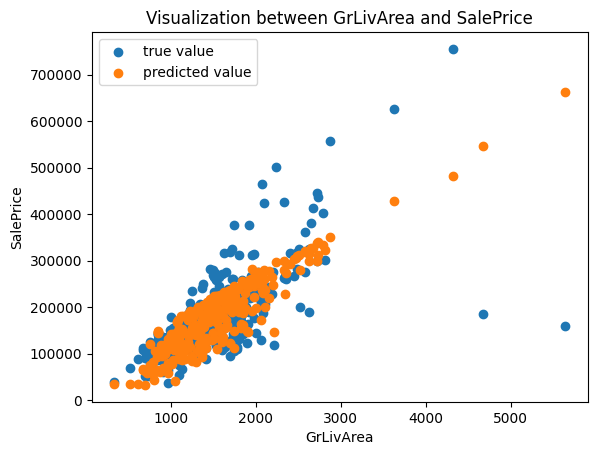

In [64]:
plot_graph('GrLivArea', 'SalePrice', X_test[:,0], y_test, reg_predict)

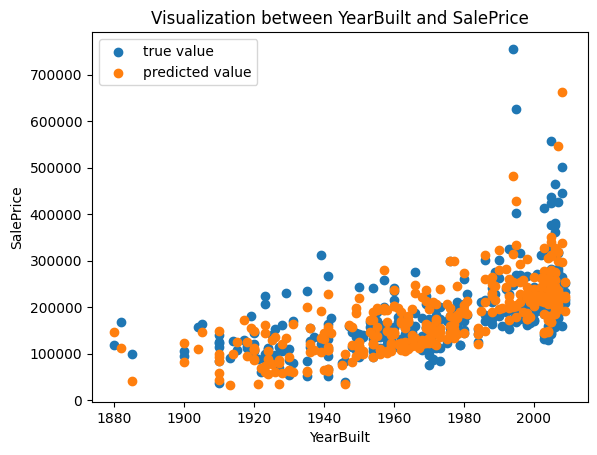

In [65]:
plot_graph('YearBuilt', 'SalePrice', X_test[:,1], y_test, reg_predict)

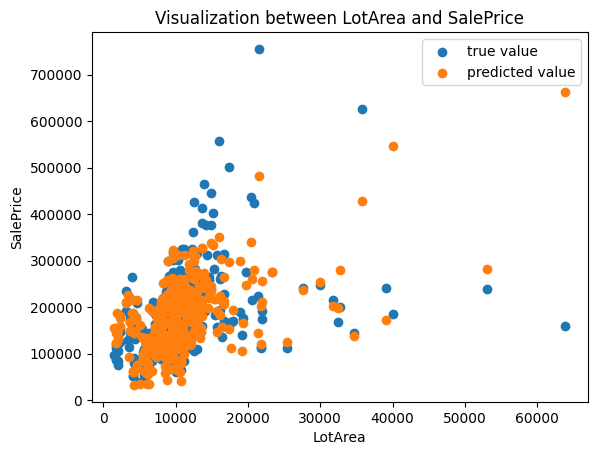

In [66]:
plot_graph('LotArea', 'SalePrice', X_test[:,2], y_test, reg_predict)

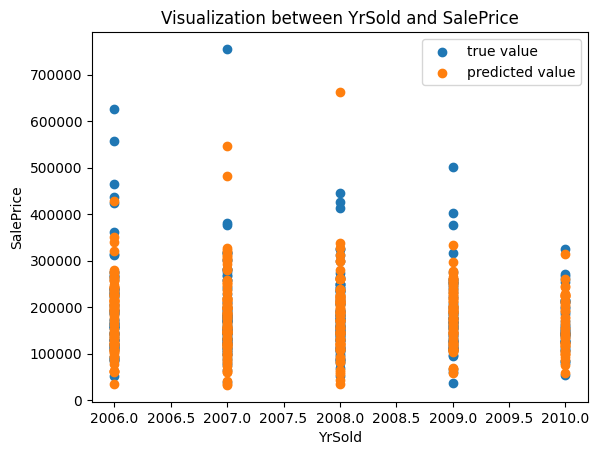

In [67]:
plot_graph('YrSold', 'SalePrice', X_test[:,3], y_test, reg_predict)

### SVR

In [68]:
svr = SVR()
svr.fit(X_train, y_train)
svr_predict = svr.predict(X_test)
print('Men Squared Error: ', mean_squared_error(y_test, svr_predict))

Men Squared Error:  7577982572.302994


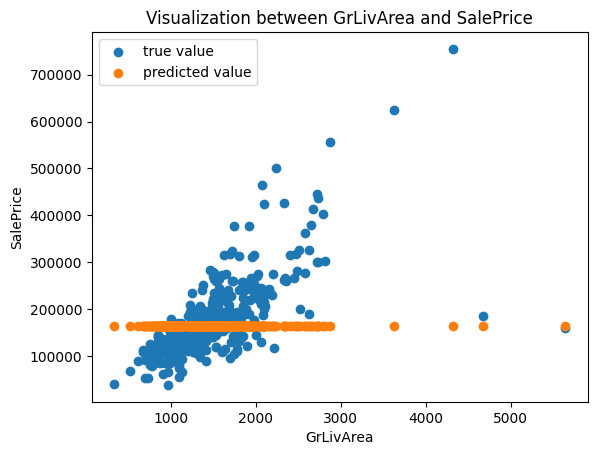

In [69]:
plot_graph('GrLivArea', 'SalePrice', X_test[:,0], y_test, svr_predict)

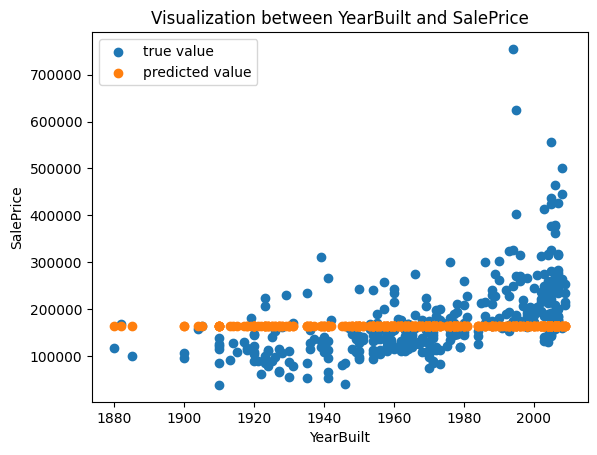

In [70]:
plot_graph('YearBuilt', 'SalePrice', X_test[:,1], y_test, svr_predict)

(365, 4)


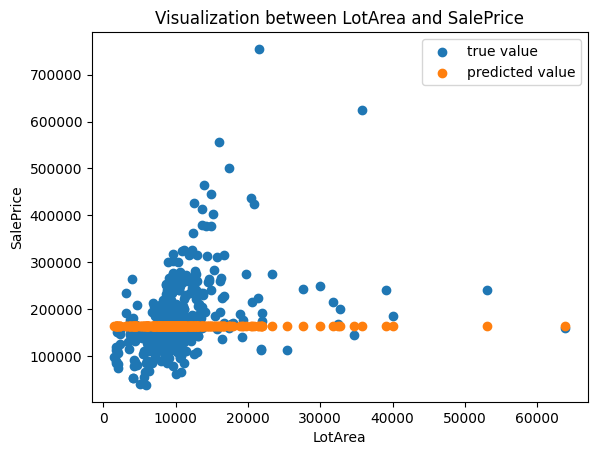

In [71]:
print(X_test.shape)
plot_graph('LotArea', 'SalePrice', X_test[:, 2], y_test, svr_predict)

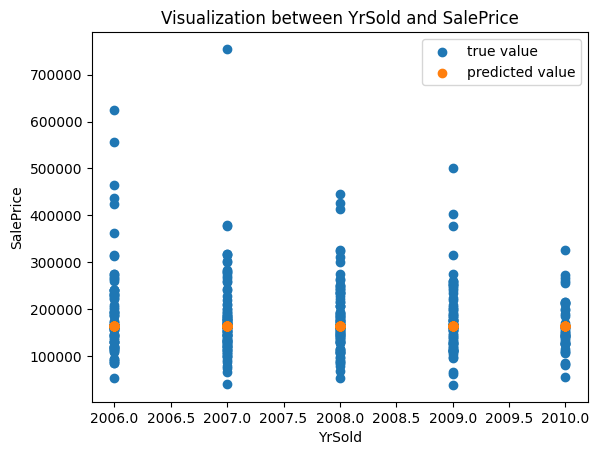

In [72]:
plot_graph('YrSold', 'SalePrice', X_test[:,3], y_test, svr_predict)

## Desicion tree

In [73]:
d_tree = DecisionTreeRegressor()
d_tree.fit(X_train, y_train)
d_tree_predict = d_tree.predict(X_test)
print('Mean Squared error: ', mean_squared_error(y_test, d_tree_predict))

Mean Squared error:  2750537225.849315


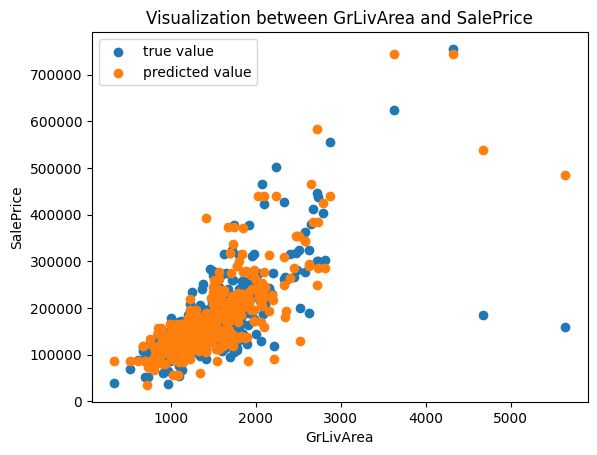

In [74]:
plot_graph('GrLivArea', 'SalePrice', X_test[:,0], y_test, d_tree_predict)

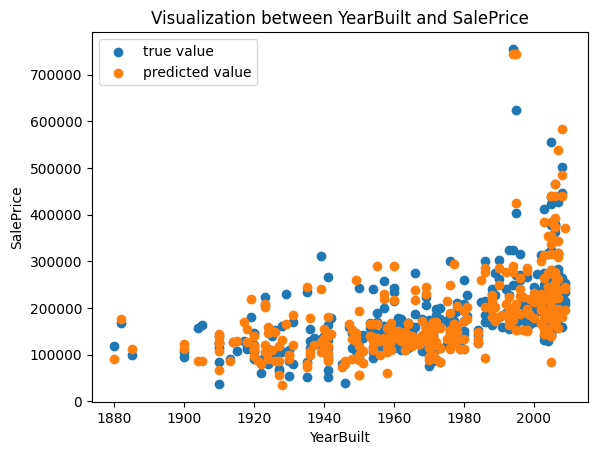

In [75]:
plot_graph('YearBuilt', 'SalePrice', X_test[:,1], y_test, d_tree_predict)

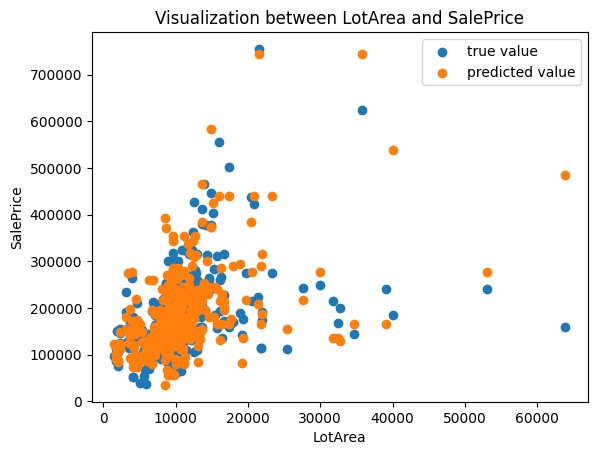

In [76]:
plot_graph('LotArea', 'SalePrice', X_test[:,2], y_test, d_tree_predict)

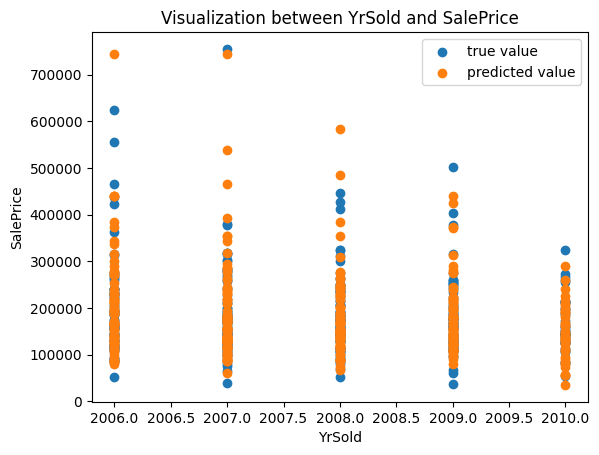

In [77]:
plot_graph('YrSold', 'SalePrice', X_test[:,3], y_test, d_tree_predict)

### Random Forest

In [78]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
rand_forest_predict = rand_forest.predict(X_test)
print('Mean Squared error: ', mean_squared_error(y_test, rand_forest_predict))

Mean Squared error:  3611909712.893151


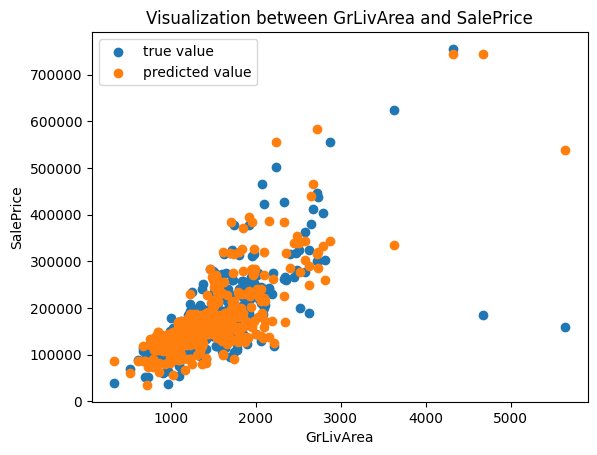

In [79]:
plot_graph('GrLivArea', 'SalePrice', X_test[:,0], y_test, rand_forest_predict)

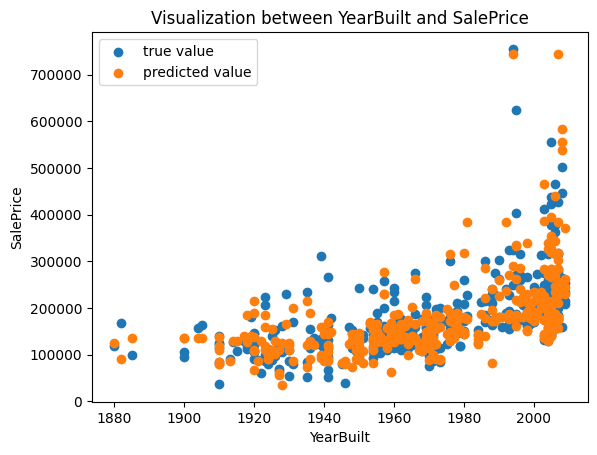

In [80]:
plot_graph('YearBuilt', 'SalePrice', X_test[:,1], y_test, rand_forest_predict)

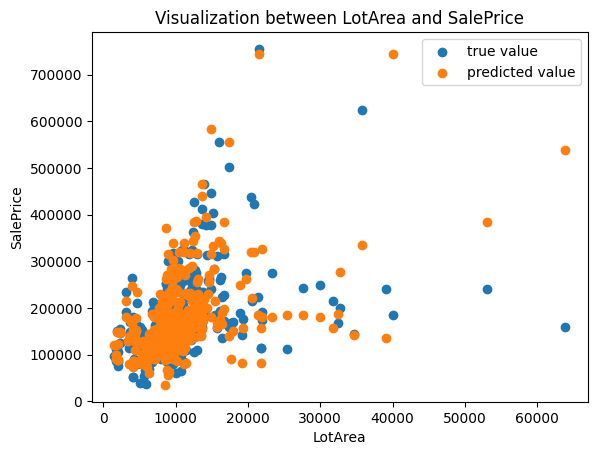

In [81]:
plot_graph('LotArea', 'SalePrice', X_test[:,2], y_test, rand_forest_predict)

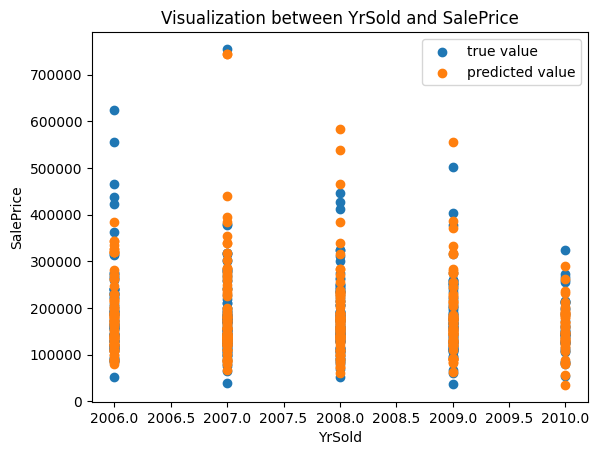

In [82]:
plot_graph('YrSold', 'SalePrice', X_test[:,3], y_test, rand_forest_predict)